## Create Pipeline for run and comparing models


In [1]:
# Generic Dependencies
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
import os

# Plotting Libraries
from matplotlib import pyplot as plt
import seaborn as sns

# SKLearn Libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, LassoCV, Ridge,RidgeCV
from sklearn.model_selection import cross_validate

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#XGBoost libraries
import xgboost as xgb

# explain xgboost preiction and model
import shap


# import generateXdata.py to prepare the data
# from generateXdata import generateX
from generateXdata import generateX

#Import Custom ml models
from Cls_ml_models import ml_models_tuned


In [2]:
# gobal variables
dataFilePath = "dataforfinalproject"
filename = "RECS_COMBINED_DATA.csv"
cols_file = "Final_Columns_withCat.csv"

 

# delcare target variables
target = {"BTU":"TOTALBTU", "DOLLAR":"TOTALDOLLAR"}
modelsList = {"LR": "Linear Regression", 
          "Lasso": "Classic Lasso", 
          "LassoCV":"Lasso with CV", 
            "RidgeCV" : "Ridge with CV",
            "eNet" : "ElasticNet with GridSearch",
          "RF":"Random Forest", 
          "xgb":"XGBoost"}

# modelsList = {"LR": "Linear Regression", 
#           "CLasso": "Classic Lasso", 
#           "CV_Lasso":"Lasso with CV", 
#             "RF":"Random Forest",
#           "XG":"XGBoost"}

# common model params
folds = 5
seed = 30
test_size = 0.2

### Prepare Data

In [3]:
X = {}
y = {}
vocab = {}
# obtain features contributing to the Y = BTU or DOllar
for t, col in target.items():
    print(f"\nExtracting data for target : {t}........\n")
    X[t], vocab[t] = generateX(ohe = True, target = t)
    y[t] = pd.read_csv(os.path.join(dataFilePath,filename), low_memory = False)[col]
    


Extracting data for target : BTU........

 X Features shape : (21430, 87)
y label shape : (21430,)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (21430, 72)

Extracting data for target : DOLLAR........

 X Features shape : (21430, 87)
y label shape : (21430,)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', '

In [5]:
print(f"Shape of X values for DOLLAR as target : {X['DOLLAR'].shape}")
print(f"Shape of X values for BTU as target : {X['BTU'].shape}")
print(f"Shape of y values for DOLLAR as target : {y['DOLLAR'].shape}")
print(f"Shape of y values for DOLLAR as target : {y['BTU'].shape}")


Shape of X values for DOLLAR as target : (21430, 79)
Shape of X values for BTU as target : (21430, 72)
Shape of y values for DOLLAR as target : (21430,)
Shape of y values for DOLLAR as target : (21430,)


### Define model functions with default params (no configuration changes)


In [6]:
# prepare models
models_BT = []
models_BT.append(('LR', LinearRegression()))
models_BT.append(('Lasso', Lasso()))
models_BT.append(('LassoCV', LassoCV()))
models_BT.append(('RidgeCV', Ridge()))
models_BT.append(('eNet', ElasticNet()))
models_BT.append(('RF', RandomForestRegressor()))
models_BT.append(('xgb', xgb.XGBRegressor(objective = "reg:linear")))


In [7]:
# evaluate each model in turn
results_mse = []
results_r2 = []
names = []
exp_var = []
scoring = {'mse': 'neg_mean_squared_error',
           'r2': 'r2',
           'exp_var': 'explained_variance'}

### Create the list of Models that will be run in sequence


In [8]:
for name, model in models_BT:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_validate(model, X["DOLLAR"], y["DOLLAR"], cv=kfold, scoring=scoring)
    print(sorted(cv_results.keys())  )
    results_mse.append(cv_results['test_mse'])
    results_r2.append(cv_results['test_r2'])
    exp_var.append(cv_results['test_exp_var'])
    names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']


In [9]:
len(names)

7

In [10]:
results_rmse = []
for i , v in enumerate(results_mse):
    results_rmse.append(np.sqrt(v * -1))

len(results_rmse)

7

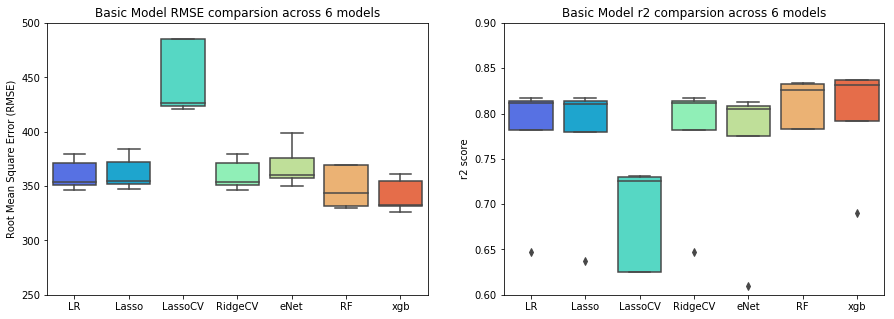

In [11]:
# plot categorical variables
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
sns.boxplot(names, results_rmse, palette = "rainbow")
ax1.set_ylim(250, 500)
ax1.set_ylabel("Root Mean Square Error (RMSE)")
ax1.set_title("Basic Model RMSE comparsion across 6 models")

ax2 = plt.subplot(1,2,2)
sns.boxplot(names, results_r2, palette = "rainbow")
ax2.set_ylim(0.6, 0.9)
ax2.set_ylabel("r2 score")
ax2.set_title("Basic Model r2 comparsion across 6 models")

plt.show()

### Comparing models (after tuning)

In [12]:
m = ml_models_tuned(X['DOLLAR'], y["DOLLAR"], seed, folds, test_size, early_stop = 20)
# prepare models
models_t = []
models_t.append(('LR', m.ret_LR_tunedModel()))
models_t.append(('Lasso', m.ret_Classo_tunedModel()))
models_t.append(('LassoCV', m.ret_LassoCV_tunedModel()))
models_t.append(('RidgeCV', m.ret_RidgeCV_tunedModel()))
models_t.append(('eNet', m.ret_eNet_tunedModel()))
models_t.append(('RF', m.ret_RF_tunedModel()))
models_t.append(('xgb', m.ret_xgb_tunedModel()))


Best Linear Regression model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 Begining to tune Lasso Regression Model.................................

Best Lasso model with alpha = 0.01 is Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best LassoCV model with alpha 0.003833672492926608 is LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)
Best LassoCV model with alpha 0.0 is RidgeCV(alphas=array([ 0.   ,  0.003,  0.006,  0.009,  0.012,  0.015,  0.018,  0.021,
        0.024,  0.027,  0.03 ,  0.033,  0.036,  0.039,  0.042,  0.045,
        0.048]),
    cv=30, fit_intercept=True, gcv_mode=None, normalize=True, scor

In [13]:
# evaluate each model in turn
results_mse_t = []
results_r2_t = []
names_t = []
exp_var_t = []
scoring_t = {'mse': 'neg_mean_squared_error',
           'r2': 'r2',
           'exp_var': 'explained_variance'}
estimators = []

### Create the list of Models that will be run in sequence


In [14]:
for name, model in models_t:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_validate(model, X["DOLLAR"], y["DOLLAR"], cv=kfold, scoring=scoring_t)
    print(sorted(cv_results.keys())  )
    results_mse_t.append(cv_results['test_mse'])
    results_r2_t.append(cv_results['test_r2'])
    exp_var_t.append(cv_results['test_exp_var'])
    names_t.append(name)
#     estimators.append(cv_results['estimator'])
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']
['fit_time', 'score_time', 'test_exp_var', 'test_mse', 'test_r2', 'train_exp_var', 'train_mse', 'train_r2']


In [15]:
results_rmse_t = []
for i , v in enumerate(results_mse_t):
    results_rmse_t.append(np.sqrt(v * -1))

results_rmse_t

[array([ 379.1333827 ,  351.30020818,  354.05760484,  346.59007958,
         370.77314102]),
 array([ 379.06318055,  351.30229512,  354.06192877,  346.5903348 ,
         370.76910132]),
 array([ 387.24240769,  351.45832081,  354.8086377 ,  347.01666141,
         368.71010234]),
 array([ 392.47674879,  351.30020818,  354.05760484,  346.59007958,
         370.77314102]),
 array([ 379.10947704,  351.35624732,  354.1056266 ,  346.57542131,
         370.80987928]),
 array([ 542.56862876,  333.01994666,  337.39939824,  338.70236585,
         379.21646203]),
 array([ 316.99214576,  260.62715486,  273.38911653,  265.67762485,
         294.17147719])]

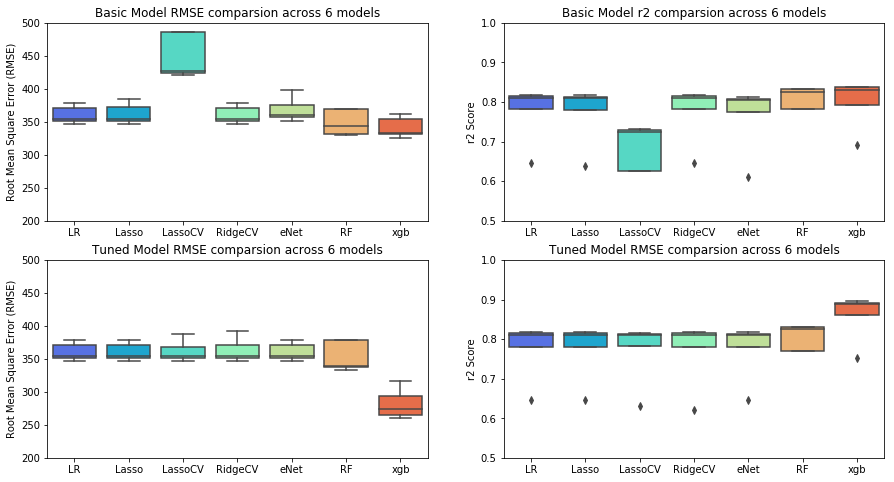

In [16]:
# plot categorical variables
fcols = 2
frows = 2
plt.figure(figsize=(15,4*frows))

ax1 = plt.subplot(2,2,1)
sns.boxplot(names, results_rmse, palette = "rainbow")
ax1.set_ylim(200, 500)
ax1.set_ylabel("Root Mean Square Error (RMSE)")
ax1.set_title("Basic Model RMSE comparsion across 6 models")

ax2 = plt.subplot(2,2,2)
sns.boxplot(names, results_r2, palette = "rainbow")
ax2.set_ylim(0.5, 1.0)
ax2.set_ylabel("r2 Score")
ax2.set_title("Basic Model r2 comparsion across 6 models")

ax3 = plt.subplot(2,2,3)
sns.boxplot(names, results_rmse_t, palette = "rainbow")
ax3.set_ylim(200, 500)
ax3.set_ylabel("Root Mean Square Error (RMSE)")
ax3.set_title("Tuned Model RMSE comparsion across 6 models")

ax4 = plt.subplot(2,2,4)
sns.boxplot(names, results_r2_t, palette = "rainbow")
ax4.set_ylim(0.5, 1.0)
ax4.set_ylabel("r2 Score")
ax4.set_title("Tuned Model RMSE comparsion across 6 models")

plt.show()

### Fit and Predict Y (Dollar or BTU) for all models

In [17]:
print("Begin to fit & predict with Models...")
print("--------------------------------------------------------------------------------------")

# results

BTU_y_pred = pd.DataFrame()
BTU_RMSE_test = {}
BTU_r2_test = {}

DOL_y_pred = pd.DataFrame()
DOL_RMSE_test = {}
DOL_r2_test = {}

# create a instance for class ml_models
# models_BTU = ml_models_recs(X['BTU'], y["BTU"], seed, folds, test_size, early_stop = 20)
# models_DOL = ml_models_recs(X['DOLLAR'], y["DOLLAR"], seed, folds, test_size, early_stop = 20)

# BTU_y_pred["ActualY"] = m.get_y_test()
# BTU_y_pred.reset_index(inplace = True)

DOL_y_pred["ActualY"] = m.get_y_test()
DOL_y_pred.reset_index(inplace = True)

# print("\n BEGIN PREDICTION FOR TOTAL BTU\n")
# Run loop for BTU
# for m, name in modelsList.items():
#     BTU_y_pred[m], BTU_RMSE_test[m],BTU_r2_test[m] = models_BTU.runModel(m)

print("\n BEGIN PREDICTION FOR TOTAL DOLLAR\n")
# Run loop for Dollar
for name, model_config in models_t:
    DOL_y_pred[name], DOL_RMSE_test[name],DOL_r2_test[name] = m.runModel(model_config, name)

Begin to fit & predict with Models...
--------------------------------------------------------------------------------------

 BEGIN PREDICTION FOR TOTAL DOLLAR

Begining to run Linear regression Model.................................

Model used for Fitting and Predicting is LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False).....................

Fit train data to the model.....................

Predict Y values for test data.....................

Linear Regression Model report
----------------------------------------------------------------

Test RMSE: 346.449504
The accuracy of the linear regressor is 0.81 out of 1 on the testing data

Begining to run Classic Lasso regression Model (alpha = 0.01).................................

Model used for Fitting and Predicting is Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm

Fitting Train data to the model 
----------------------------------------------------------------

Predicting Y with test data
----------------------------------------------------------------

XGBoost Model report
----------------------------------------------------------------

Train RMSE: 123.228780
Test RMSE: 256.019080
The accuracy of the xgboost regressor is 0.98 out of 1 on the training data
The accuracy of the xgboost regressor is 0.90 out of 1 on the test data


In [18]:
# BTU_y_pred.drop(['index'], axis = 1, inplace = True)
DOL_y_pred.drop(['index'], axis = 1, inplace = True)

In [35]:
# BTU_y_pred.describe()

,ActualY,LR,CLasso,CV_Lasso,RF,XG
count,4.519000e+03,4519.000000,4519.000000,4519.000000,4519.000000,4519.000000
mean,8.760170e+04,87865.891570,87865.894668,87881.288640,87251.076842,87607.921875
std,5.556450e+04,48100.646360,48100.625219,47975.881013,47547.839897,49559.753906
min,0.000000e+00,-6004.660833,-6004.628146,-5391.804289,21153.109600,5048.538086
25%,4.921850e+04,53715.260390,53715.539043,53851.745611,53136.100503,51463.712891
50%,7.789200e+04,79525.994296,79525.837293,79426.700271,77267.165011,78471.101562
75%,1.151245e+05,113628.839551,113628.771290,113567.495210,114102.227351,115189.863281
max,1.096083e+06,680831.340674,680830.194246,676743.221086,516444.183960,628899.750000


In [19]:
DOL_y_pred.describe()

,ActualY,LR,Lasso,LassoCV,RidgeCV,eNet,RF,xgb
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,1737.594813,1737.722054,1737.718235,1737.493726,1737.722054,1737.689081,1733.844637,1732.706665
std,796.561647,726.012537,726.000989,723.313049,726.012537,725.886387,698.657481,741.767090
min,0.000000,-310.047308,-310.118799,-310.055859,-310.047308,-309.538157,222.581233,101.871521
25%,1146.000000,1200.585102,1200.550621,1204.212560,1200.585102,1200.857990,1225.310573,1167.165802
50%,1642.500000,1678.624792,1678.723820,1678.863674,1678.624792,1678.338216,1698.512619,1677.363586
75%,2255.000000,2206.604588,2206.533606,2203.354515,2206.604588,2206.299576,2208.658414,2247.499390
max,3995.000000,4869.347964,4869.643136,4849.011460,4869.347964,4870.496988,3629.139812,3945.249756


In [32]:
print(DOL_RMSE_test)
print(DOL_r2_test)

# DOL_results = pd.DataFrame(DOL_RMSE_test.values(), columns = ['RMSE'])



{'LR': 346.4495036924344, 'Lasso': 346.45160241424747, 'LassoCV': 346.25049738341357, 'RidgeCV': 346.44950369243412, 'eNet': 346.45258401976554, 'RF': 335.61721313373181, 'xgb': 256.01908006745128}
{'LR': 0.81079071535728964, 'Lasso': 0.8107884229663268, 'LassoCV': 0.81100802279444417, 'RidgeCV': 0.81079071535728997, 'eNet': 0.81078735077390551, 'RF': 0.82243759841790365, 'xgb': 0.89667456979816995}


In [49]:
DOL_results = pd.DataFrame(DOL_RMSE_test, index = ['RMSE'])
DOL_results = DOL_results.append(pd.DataFrame(DOL_r2_test, index = ['r2']))

DOL_results = DOL_results.T

DOL_results['r2'] = DOL_results.r2.apply(lambda r: round(r*100, 2))

In [50]:
DOL_results

,RMSE,r2
LR,346.449504,81.08
Lasso,346.451602,81.08
LassoCV,346.250497,81.10
RidgeCV,346.449504,81.08
eNet,346.452584,81.08
RF,335.617213,82.24
xgb,256.019080,89.67


Index(['level_0', 'level_1', 0], dtype='object')


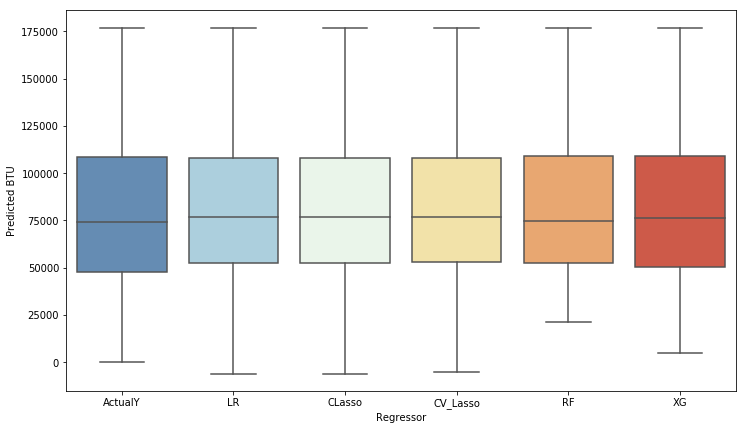

In [37]:

BTU_y_pred_new = pd.DataFrame(BTU_y_pred.stack()).reset_index()
print(BTU_y_pred_new.columns)

BTU_y_pred_new.drop(['level_0'], axis = 1, inplace = True)
BTU_y_pred_new.columns = ['Regressor','Predicted Y']

BTU_y_pred_new = BTU_y_pred_new[BTU_y_pred_new['Predicted Y'] < (np.percentile(BTU_y_pred_new['Predicted Y'], 75) + np.percentile(BTU_y_pred_new['Predicted Y'],35 ))]
BTU_y_pred_new.head(6)

box_ax = sns.boxplot(x="Regressor", y="Predicted Y", data=BTU_y_pred_new, palette='RdYlBu_r')

box_ax.set(xlabel='Regressor', ylabel=f'Predicted BTU')

fig = plt.gcf()
fig.set_size_inches( 12, 7)

# plt.savefig(os.path.join(image_dir,"AvgTemp_boxPlot.png"))

plt.show()

Index(['level_0', 'level_1', 0], dtype='object')


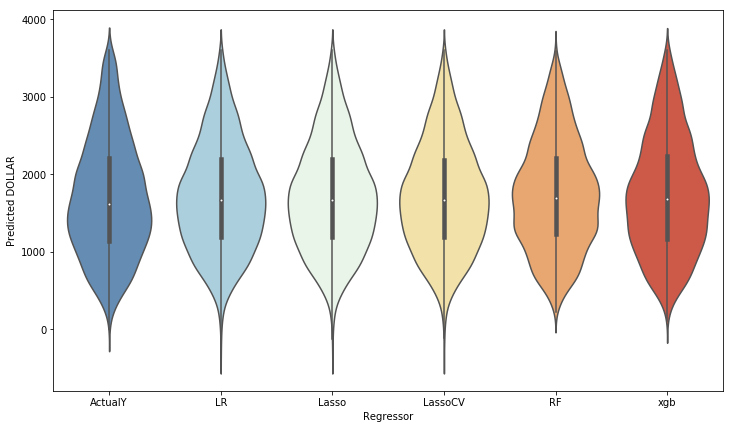

In [21]:

DOL_y_pred_new = pd.DataFrame(DOL_y_pred.stack()).reset_index()
print(DOL_y_pred_new.columns)

DOL_y_pred_new.drop(['level_0'], axis = 1, inplace = True)
DOL_y_pred_new.columns = ['Regressor','Predicted Y']

DOL_y_pred_new = DOL_y_pred_new[DOL_y_pred_new['Predicted Y'] < (np.percentile(DOL_y_pred_new['Predicted Y'], 75) + np.percentile(DOL_y_pred_new['Predicted Y'],35 ))]
# BTU_y_pred_new.head(6)

box_ax = sns.violinplot(x="Regressor", y="Predicted Y", data=DOL_y_pred_new, palette='RdYlBu_r')

box_ax.set(xlabel='Regressor', ylabel=f'Predicted DOLLAR')

fig = plt.gcf()
fig.set_size_inches( 12, 7)

# plt.savefig(os.path.join(image_dir,"AvgTemp_boxPlot.png"))

plt.show()

In [7]:
models_BTU = ml_models_recs(X['BTU'], y["BTU"], seed, folds, test_size, early_stop = 20)



Begining to run Linear regression Model.................................

Configuring the model.....................

Fit train data to the model.....................

Predict Y values for test data.....................

Linear Regression Model report
----------------------------------------------------------------

Test RMSE: 26487.268116
The accuracy of the linear regressor is 0.77 out of 1 on the testing data


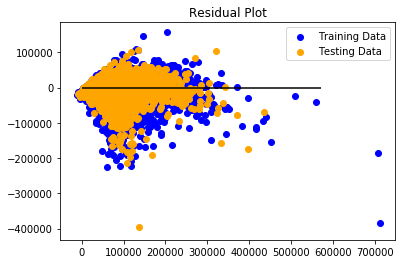


Begining to run Classic Lasso regression Model (alpha = 0.01).................................

Configuring and fit training data to the model.....................

Predict y values for train and test data.....................

Classic Lasso Regresion Model report
----------------------------------------------------------------

Train RMSE: 24271.402086
Test RMSE: 26487.270550
The accuracy of the Classic Lasso regressor is 0.79 out of 1 on the training data
The accuracy of the Classic Lasso regressor is 0.77 out of 1 on the test data

Begining to run Lasso CV regression Model (alpha = determined by K-Folds).................................

Run cross validation on training data to get best model iteration.....................

The best model's Alpha is  0.277454750679
Fit the best model from k-folds to training data................
best model coefficients:
[725.237873910841, 8.622357431189844, 31.92853244962305, 12.127053035819245, 4.360116995011201, -132.48118693100824, 0.0, 3.031325

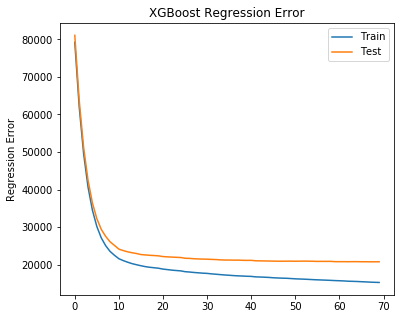


Begining to run elasticNet Model.................................

Configuring and finding best model using GridSearchCV.....................

Fit train data to the best model.....................

Predict Y for test data.....................

ElasticNet Model report
----------------------------------------------------------------

Test RMSE: 26490.420758
The accuracy of the elasticNet regressor is 0.77 out of 1 on the test data


In [8]:
# prepare models
models = []
models.append(('LR', models_BTU.linearmodel()))
models.append(('Classo', models_BTU.classic_lasso_model()))
models.append(('CVLasso', models_BTU.lasso_CV()))
models.append(('RF', models_BTU.RF_model()))
models.append(('XG', models_BTU.xgb_model()))
models.append(('EN_GR', models_BTU.eNet_model()))
# evaluate each model in turn
results = []
names = []
scoring = 'rmse'